In [1]:
import pandas as pd

def load_data(filename):
    return pd.read_csv(filename)

data = load_data('Titanic/train.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


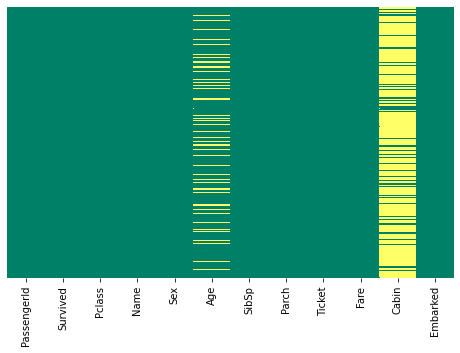

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(8,5))
sns.heatmap(
    data.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='summer'
)
plt.show()

In [4]:
import pandas as pd
def split_name(data):
    def split_name_series(string):
        return pd.Series(
            (string.split(', ')),
            index='firstName secondName'.split()
        )
    result = data['Name'].apply(split_name_series)
    data[result.columns] = result
    
    data.drop(columns=['Name'], inplace=True)
    
    return data

data = (
    load_data('Titanic/train.csv').
    pipe(split_name)
)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [6]:
def one_hot_encoding(data, col_name, categories):
    
    def split_col(col_data):
        return pd.get_dummies(col_data).T.reindex(categories).T.astype(int)
    
    data[categories] = split_col(data[col_name])
    
    data.drop(columns=[col_name], inplace=True)
    
    return data

data = (
    load_data('Titanic/train.csv')
    .pipe(split_name)
    .pipe(one_hot_encoding, 'Sex', ['male', 'female'])
)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,male,female
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,0


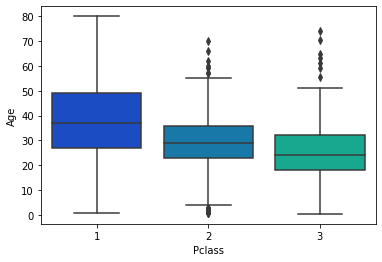

In [8]:
import seaborn as sns

sns.boxplot(
    x='Pclass',
    y='Age',
    data=data,
    palette='winter'
)

In [9]:
pclass_age_map = {
  1: 37,
  2: 29,
  3: 24,
}

def fill_na(data, fill_col, map_col, fill_map):
    cond = data[fill_col].isna()
    
    data.loc[cond, fill_col] = data.loc[cond, map_col].map(fill_map)
    
    return data

data = (
    load_data('Titanic/train.csv')
    .pipe(split_name)
    .pipe(one_hot_encoding, 'Sex', ['male', 'female'])
    .pipe(fill_na, 'Age', 'Pclass', pclass_age_map)
)

In [10]:
data[['Pclass', 'Age']].isna().sum()

Pclass    0
Age       0
dtype: int64

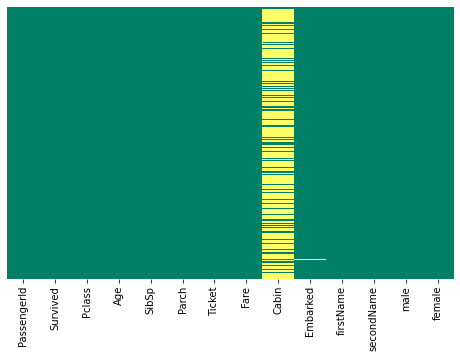

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(8,5))
sns.heatmap(
    data.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='summer'
)
plt.show()

In [12]:
def binning(data, col_name, bins, labels): # One hot encoding for continous type data
    data[col_name+'_bin'] = pd.cut(data[col_name], bins=bins, labels=labels)
    return data

data = (
    load_data('Titanic/train.csv')
    .pipe(split_name)
    .pipe(one_hot_encoding, 'Sex', ['male', 'female'])
    .pipe(fill_na, 'Age', 'Pclass', pclass_age_map)
    .pipe(binning, 'Age', [0, 13, 19, 61, 120], ['<12', 'Teen', 'Adult', 'Elder'])
    .pipe(one_hot_encoding, 'Age_bin', ['<12', 'Teen', 'Adult', 'Elder'])
)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,male,female,<12,Teen,Adult,Elder
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,0,0,0,1,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,1,0,0,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,1,0,0,1,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,1,0,0,1,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,0,0,0,1,0
